In [18]:
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image, ImageEnhance
from matplotlib import pyplot as plt

import functions
import pickle
import time

%matplotlib inline

import time

In [19]:
#load models
collection,meta = functions.load_faiss_index()
embbeding_model,preprocess,device = functions.load_embbedings_model()
yolo_model = 'models/my-modelv6.pt'
model = YOLO(yolo_model)  # build a new model from scratch


0: 480x640 26 pokemon-cards, 2837.7ms
Speed: 98.0ms preprocess, 2837.7ms inference, 125.8ms postprocess per image at shape (1, 3, 480, 640)
[[17090  3032 15685  8119 17082]]
[[    0.44959     0.82916     0.86637     0.86779     0.86839]]
[[17600 12925 13056  6842  7107]]
[[    0.77311     0.83862     0.85217      0.8572      0.8595]]
[[10954 13257  7722 13176  1328]]
[[    0.45241     0.62229     0.67518     0.68214     0.68591]]
[[10822   468 15243 18307   648]]
[[     0.3905     0.59719     0.61332     0.67827     0.67939]]
[[10815 10528 10020  4634  5470]]
[[    0.48813     0.59409     0.60382     0.60989     0.61978]]
[[ 7274 19310  6045  4421  4911]]
[[    0.89067     0.93706     0.94288     0.95869     0.95995]]
[[10939  7199 11131  7678  6712]]
[[    0.57333     0.68511     0.68748      0.6982     0.69881]]
[[ 7803  2909 15408 13338  2460]]
[[    0.57549     0.58453     0.58547     0.59602     0.59797]]
[[10925 11002  7922  7902  6717]]
[[    0.65899     0.79548     0.80682    

/var/folders/xw/jbdftnls743fmr_8vt56xqc00000gn/T/ipykernel_51045/721692166.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, axarr = plt.subplots(1,3)


[[ 4649 11006  7343  4617  6504]]
[[    0.53265     0.56096     0.56161     0.56989     0.58817]]
[[10972 11046 11228  4871 11366]]
[[    0.59133     0.64703     0.65786     0.66375     0.66535]]
[[ 9620  6835  3040 10999  3303]]
[[     0.5752     0.59787     0.60978     0.61525     0.62185]]
[[ 7058  7274   668 11409   491]]
[[     1.0158      1.0181      1.0257      1.0317      1.0338]]
[[13416  6069 19268 10931  5495]]
[[    0.88137     0.89071     0.89625     0.90261     0.90622]]
fin des opérations


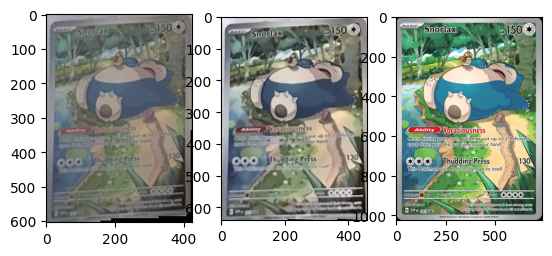

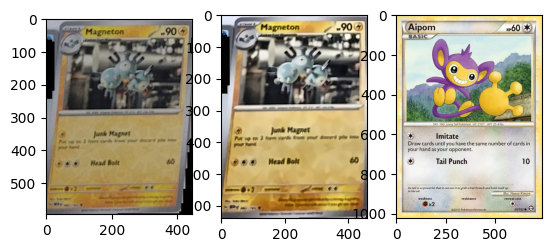

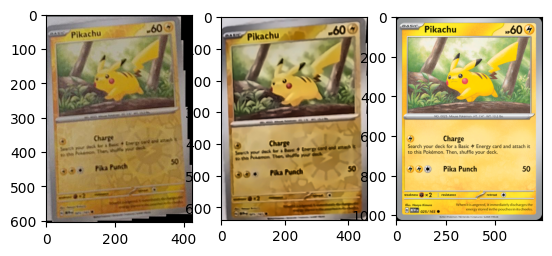

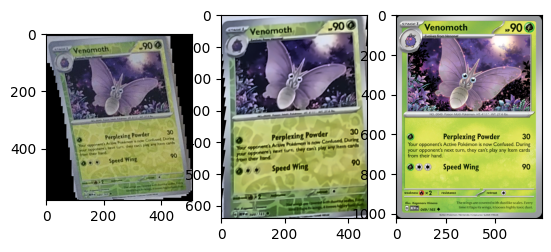

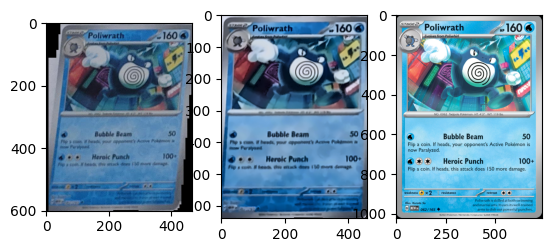

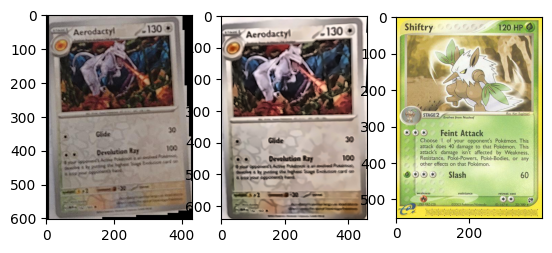

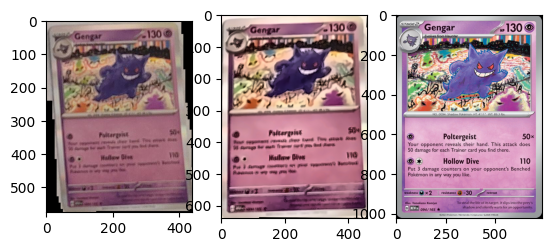

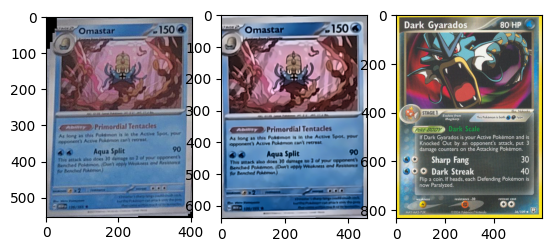

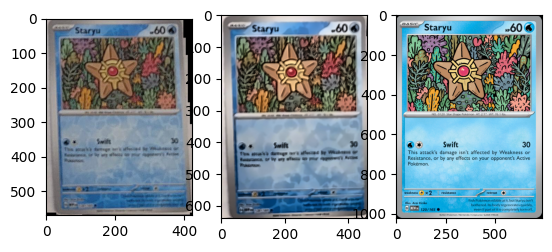

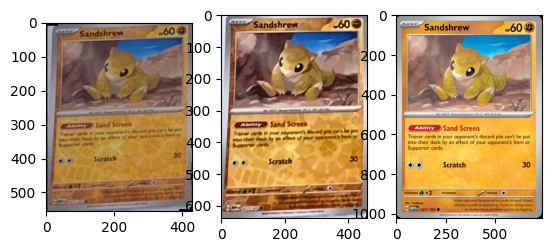

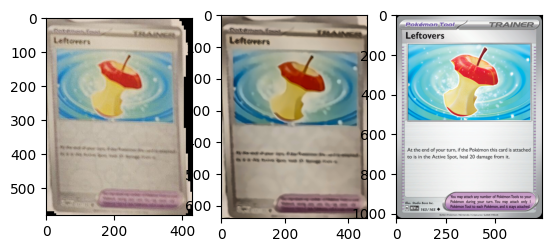

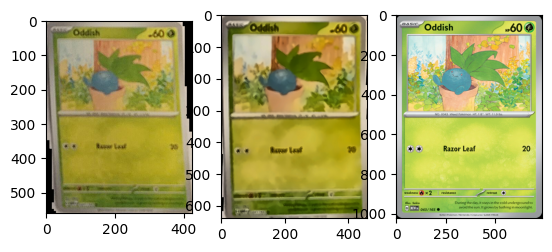

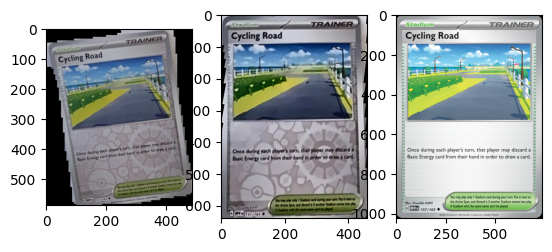

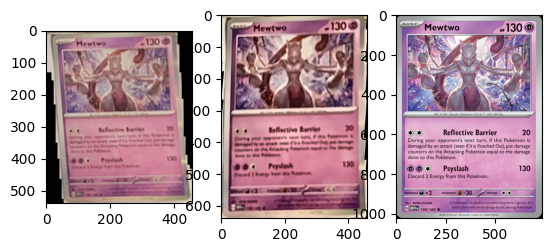

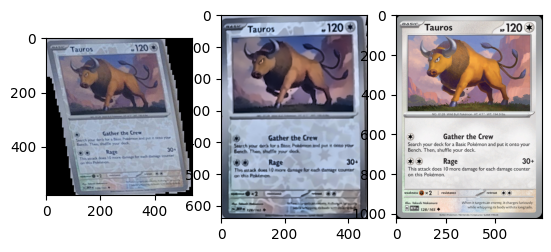

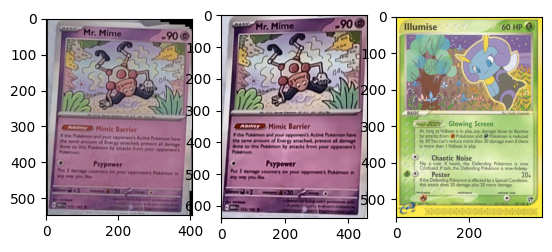

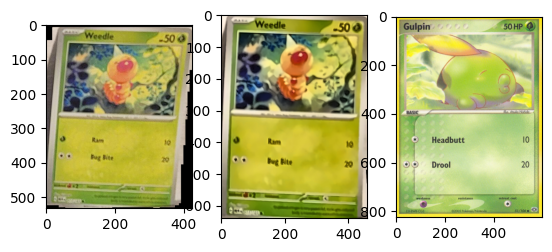

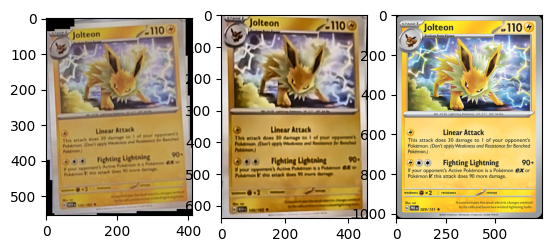

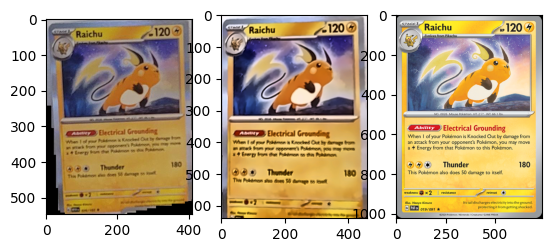

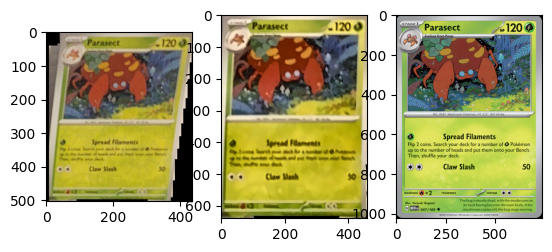

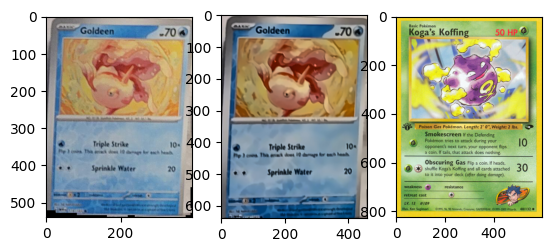

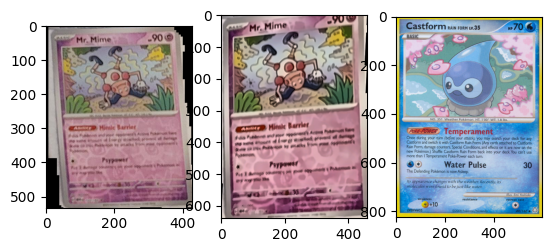

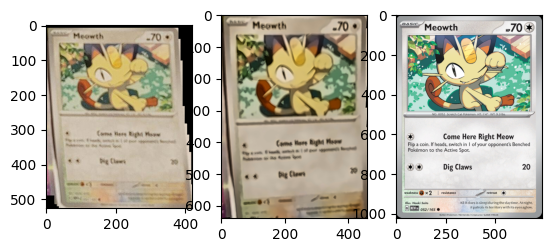

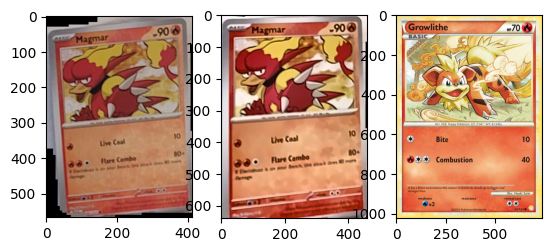

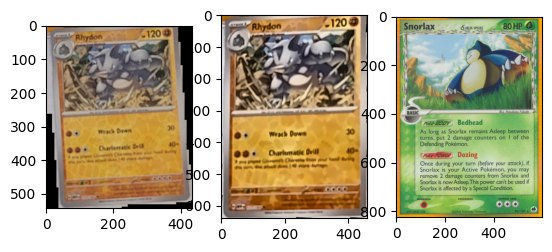

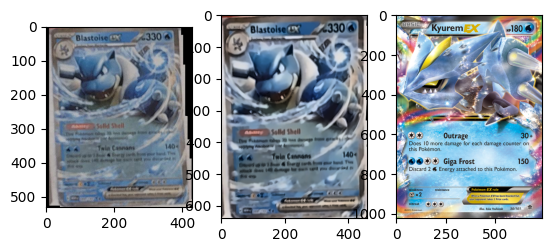

In [23]:
img_path = 'data/images/inputs/b0jlcxfsc1ub1.jpg'
pil_img = Image.open('./data/images/inputs/b0jlcxfsc1ub1.jpg').convert("RGB")

# Convert PIL image to numpy array
img = np.array(pil_img)


results = model.predict(source=pil_img, conf=0.8, device='cpu')

for r in results:
    masks = r.masks
    boxes = r.boxes
    
    if masks is None :
        print("Mask is none")
    if masks is not None:
        for i, m in enumerate(masks.data):

            # Conversion du masque en numpy (0 ou 1)
            mask = m.cpu().numpy()
            # Si masque est float (0.0–1.0) → binarisation
            mask = (mask > 0.5).astype(np.uint8) * 255
            # Vérifier la taille : doit être HxW comme img
            if mask.shape != img.shape[:2]:
                mask = cv2.resize(mask, (img.shape[1], img.shape[0]))
            # Appliquer le masque sur l'image
            segmented = cv2.bitwise_and(img, img, mask=mask)
            # Extraire la bbox correspondante
            box = boxes.xyxy[i].cpu().numpy().astype(int)
            x1, y1, x2, y2 = box
            crop_pre_improved = segmented[y1:y2, x1:x2]

            #redécoupage de l'image
            crop = functions.preprocess_img(crop_pre_improved)
            crop = functions.improve_img(crop)

            crop_inverted = cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)

            #Transform image to cv2 format
            search_results = functions.search_card_correspondance(collection,meta,crop,embbeding_model,preprocess,device)

            #display img and reference : 
            img_reference = functions.get_image_from_url(search_results['img'])
            
            #print("Image trouvée la plus probable :", search_results["name"] ," :", str(search_results[0]["price_eur"]),"EUR")

            


            f, axarr = plt.subplots(1,3)
            axarr[0].imshow(crop_pre_improved)
            axarr[1].imshow(crop)
            axarr[2].imshow(img_reference)

            
print("fin des opérations")


In [21]:
import time
start_time = time.time()
"Function"
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0015702247619628906 seconds ---


In [22]:
collection.ntotal

19505